In [2]:
import pandas as pd

In [3]:
four_wheel = pd.read_csv('4-wheeler-EV-carwale.csv')
four_wheel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review           129 non-null    object 
 1   Exterior         129 non-null    float64
 2   Comfort          129 non-null    float64
 3   Performance      129 non-null    float64
 4   Fuel Economy     129 non-null    float64
 5   Value for Money  129 non-null    float64
 6   Condition        129 non-null    object 
 7   driven           129 non-null    object 
 8   rating           129 non-null    float64
 9   model_name       129 non-null    object 
dtypes: float64(6), object(4)
memory usage: 10.2+ KB


In [4]:
four_wheel.head()

,review,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,driven,rating,model_name
0,Superb car like as fantastic as petroleum car....,5.0,4.0,5.0,5.0,5.0,New,Few hundred kilometers,5.0,hyundai kona
1,"Anti national, worst service, worst customer c...",1.0,1.0,1.0,1.0,1.0,New,Haven't driven it,0.0,hyundai kona
2,Super happy with it. The car is too good,4.0,5.0,5.0,5.0,4.0,New,Few thousand kilometers,5.0,hyundai kona
3,"Pretty good car, smooth as a glider fast car, ...",5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0,hyundai kona
4,Price difference between petrol and electronic...,4.0,4.0,5.0,3.0,2.0,Not Purchased,Haven't driven it,3.0,hyundai kona


In [5]:
four_wheel['model_name'].value_counts()

tata nexon ev    75
hyundai kona     34
tata tigor ev    20
Name: model_name, dtype: int64

In [6]:
import string
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

def clean_text(text):
  my_stopwords = stopwords.words('english')
  ps = PorterStemmer()
  #text = deEmojify(text) #to remove all emojies
  text_cleaned = "".join([x for x in text if x not in string.punctuation]) #to remove punc
  text_cleaned = re.sub(' +', ' ', text_cleaned) #to remove extra white spaces
  text_cleaned = text_cleaned.lower() #to change to lower
  tokens = text_cleaned.split(" ")
  tokens = [token for token in tokens if token not in my_stopwords] #taking only words which are not in stopwords
  text_cleaned = " ".join([ps.stem(token) for token in tokens])
  return text_cleaned
    


In [7]:
four_wheel['clean_reviews'] = four_wheel['review'].apply(clean_text)

In [8]:
from textblob import TextBlob
def getPolarity(Clean_reviews):
  return TextBlob(Clean_reviews).sentiment.polarity
four_wheel['Polarity'] = four_wheel['clean_reviews'].apply(getPolarity)

In [9]:
def getAnalysis(score):
  if score < 0:
    return -1
  elif score == 0:
    return 0
  else:
    return 1

four_wheel['Analysis'] = four_wheel['Polarity'].apply(getAnalysis)

In [10]:
four_wheel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review           129 non-null    object 
 1   Exterior         129 non-null    float64
 2   Comfort          129 non-null    float64
 3   Performance      129 non-null    float64
 4   Fuel Economy     129 non-null    float64
 5   Value for Money  129 non-null    float64
 6   Condition        129 non-null    object 
 7   driven           129 non-null    object 
 8   rating           129 non-null    float64
 9   model_name       129 non-null    object 
 10  clean_reviews    129 non-null    object 
 11  Polarity         129 non-null    float64
 12  Analysis         129 non-null    int64  
dtypes: float64(7), int64(1), object(5)
memory usage: 13.2+ KB


In [11]:
four_wheel['driven'].value_counts()

Did a short drive once     37
Few thousand kilometers    34
Few hundred kilometers     31
Haven't driven it          25
Its my mate since ages      2
Name: driven, dtype: int64

In [12]:
import numpy as np

four_wheel_x = four_wheel.iloc[:, 1:6].values

result = np.round(np.mean(four_wheel_x, axis=0), 2) 
dict(zip(four_wheel.columns[1:6], result))

{'Exterior': 4.47,
 'Comfort': 4.42,
 'Performance': 4.42,
 'Fuel Economy': 4.42,
 'Value for Money': 4.16}

In [13]:
from sklearn.decomposition import PCA


four_wheel_pca = PCA()
pf = four_wheel_pca.fit_transform(four_wheel_x)
pca_df = pd.DataFrame(pf, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

summary = {
    'Standard deviation': four_wheel_pca.explained_variance_ ** 0.5,
    'Proportion of Variance': four_wheel_pca.explained_variance_ratio_,
    'Cumulative Proportion': np.cumsum(four_wheel_pca.explained_variance_ratio_)
}

pd.DataFrame(summary, index=['PC{}'.format(i+1) for i in range(5)])

,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,2.318130,0.838905,0.838905
PC2,0.634648,0.062879,0.901783
PC3,0.536859,0.044994,0.946778
PC4,0.471836,0.034755,0.981533
PC5,0.343938,0.018467,1.000000


In [14]:
pca_df

,PC1,PC2,PC3,PC4,PC5
0,-0.994046,-0.488334,-0.083572,-0.120403,0.762876
1,7.468705,-1.105371,0.195046,-0.213836,-0.193555
2,-0.500908,0.167859,-0.569011,-0.517295,-0.627466
3,-1.407144,-0.064815,0.056179,0.073389,-0.007120
4,1.859967,1.347338,0.340370,-1.426953,-0.010503
...,...,...,...,...,...
124,0.977737,0.917384,0.004727,0.181441,0.570204
125,-1.407144,-0.064815,0.056179,0.073389,-0.007120
126,-1.407144,-0.064815,0.056179,0.073389,-0.007120
127,-0.162070,-1.126453,-0.433670,0.359516,0.022788


In [15]:
loadings = four_wheel_pca.components_
num_pc = four_wheel_pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list,np.round( loadings,3))))
loadings_df['variable'] = four_wheel.columns[1:6].values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5
variable,,,,,
Exterior,-0.370,0.505,0.270,0.385,0.622
Comfort,-0.413,0.424,0.140,0.194,-0.770
Performance,-0.462,0.133,0.081,-0.865,0.118
Fuel Economy,-0.438,-0.064,-0.880,0.153,0.078
Value for Money,-0.536,-0.738,0.356,0.205,-0.002


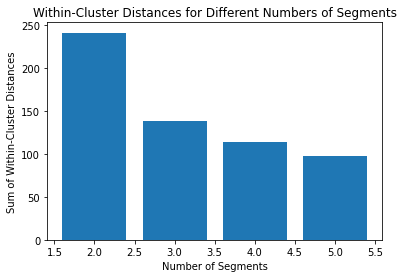

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
four_wheel_xs = scaler.fit_transform(four_wheel_x)

segment_numbers = range(2, 6)
within_cluster_distances = []

var = []
for n_clusters in segment_numbers:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    var = kmeans.fit(four_wheel_xs)
    within_cluster_distances.append(kmeans.inertia_)
    
plt.bar(segment_numbers, within_cluster_distances)

plt.xlabel("Number of Segments")
plt.ylabel("Sum of Within-Cluster Distances")
plt.title("Within-Cluster Distances for Different Numbers of Segments")
plt.show()

In [17]:
kmeans = KMeans(5)
kmeans.fit_predict(four_wheel_xs)
pca_df_km = pd.concat([pca_df, pd.DataFrame({'cluster':kmeans.labels_})], axis=1)

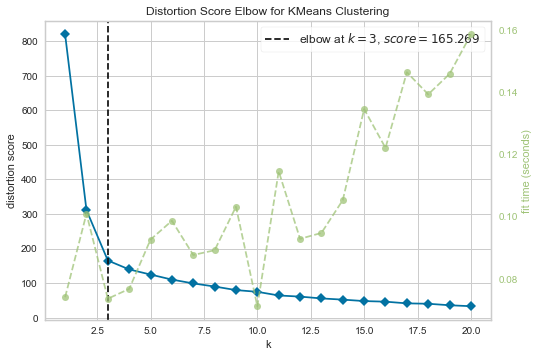

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model=KMeans()
visualizer=KElbowVisualizer(model, k=(1,21)).fit(four_wheel_x)
visualizer.show()

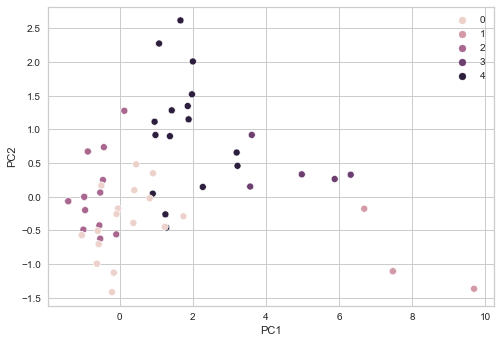

In [19]:
import seaborn as sns
sns.scatterplot(data=pd.DataFrame(pca_df_km, columns=['PC{}'.format(i+1) for i in range(11)]), x='PC1',y='PC2',hue=kmeans.labels_)
plt.legend()
plt.show()

In [20]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.mixture import GaussianMixture

scaler = StandardScaler()
X_std = scaler.fit_transform(four_wheel_x)

gmm = GaussianMixture(n_components=2, random_state=1234, n_init=10).fit(X_std)

# Print summary statistics
print(gmm.bic(X_std))
print(gmm.aic(X_std))

1132.3794117190605
1015.1271031402318


<AxesSubplot:xlabel='cluster', ylabel='count'>

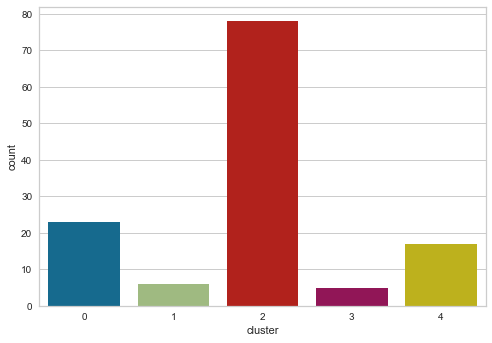

In [21]:
sns.countplot(pca_df_km, x='cluster', )

In [22]:
cluster1 = pca_df_km[pca_df_km['cluster']==0]
cluster2 = pca_df_km[pca_df_km['cluster']==1]
cluster3 = pca_df_km[pca_df_km['cluster']==2]
cluster4 = pca_df_km[pca_df_km['cluster']==3]
cluster5 = pca_df_km[pca_df_km['cluster']==4]

In [23]:
four_wheel['cluster_num']=kmeans.labels_

In [24]:
four_wheel['cluster_num'].value_counts()

2    78
0    23
4    17
1     6
3     5
Name: cluster_num, dtype: int64

In [25]:
four_wheel.head()

,review,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,driven,rating,model_name,clean_reviews,Polarity,Analysis,cluster_num
0,Superb car like as fantastic as petroleum car....,5.0,4.0,5.0,5.0,5.0,New,Few hundred kilometers,5.0,hyundai kona,superb car like fantast petroleum car speed su...,1.000000,1,2
1,"Anti national, worst service, worst customer c...",1.0,1.0,1.0,1.0,1.0,New,Haven't driven it,0.0,hyundai kona,anti nation worst servic worst custom car wors...,-0.377778,-1,1
2,Super happy with it. The car is too good,4.0,5.0,5.0,5.0,4.0,New,Few thousand kilometers,5.0,hyundai kona,super happi car good,0.516667,1,0
3,"Pretty good car, smooth as a glider fast car, ...",5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0,hyundai kona,pretti good car smooth glider fast car instant...,0.400000,1,2
4,Price difference between petrol and electronic...,4.0,4.0,5.0,3.0,2.0,Not Purchased,Haven't driven it,3.0,hyundai kona,price differ petrol electron could convinc cus...,-0.025000,-1,4


In [26]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
four_wheel['driven'] = le1.fit_transform(four_wheel['driven'])

le2 = LabelEncoder()
four_wheel['Condition'] = le2.fit_transform(four_wheel['Condition'])

le3 = LabelEncoder()
four_wheel['model_name'] = le3.fit_transform(four_wheel['model_name'])

In [27]:
four_wheel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review           129 non-null    object 
 1   Exterior         129 non-null    float64
 2   Comfort          129 non-null    float64
 3   Performance      129 non-null    float64
 4   Fuel Economy     129 non-null    float64
 5   Value for Money  129 non-null    float64
 6   Condition        129 non-null    int32  
 7   driven           129 non-null    int32  
 8   rating           129 non-null    float64
 9   model_name       129 non-null    int32  
 10  clean_reviews    129 non-null    object 
 11  Polarity         129 non-null    float64
 12  Analysis         129 non-null    int64  
 13  cluster_num      129 non-null    int32  
dtypes: float64(7), int32(4), int64(1), object(2)
memory usage: 12.2+ KB


In [28]:
from sklearn.model_selection import train_test_split
X = four_wheel.drop(['cluster_num', 'review', 'clean_reviews'], axis=1)
y = four_wheel['cluster_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=999)

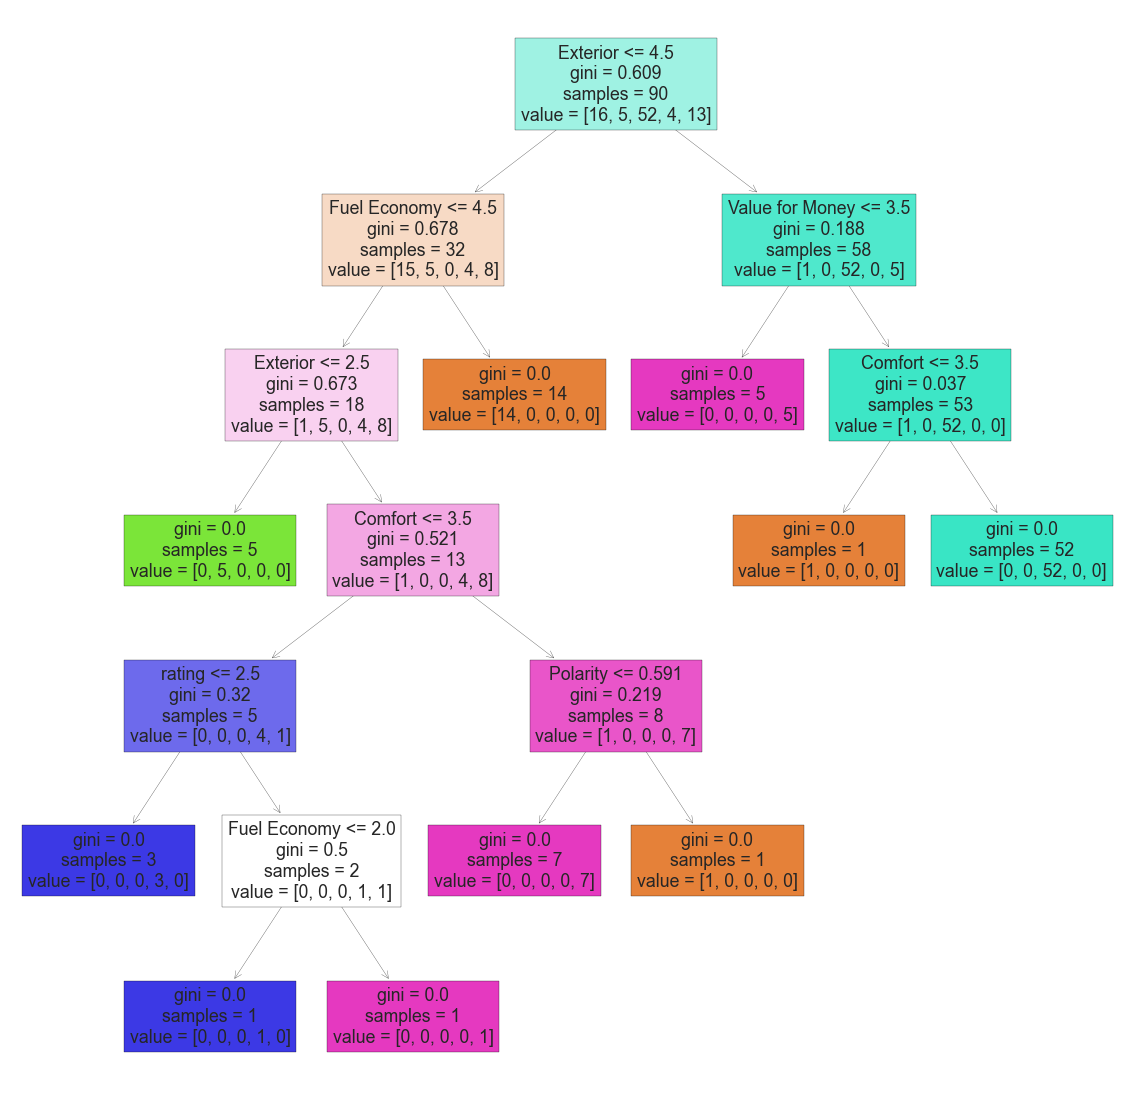

In [29]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train)
plt.figure(figsize=(20,20))
tree.plot_tree(dtc, filled=True,feature_names=X.columns,)
plt.show()

In [30]:
from sklearn.metrics import accuracy_score
y_pred = dtc.predict(X_test)
accuracy_score(y_test, y_pred)*100

92.3076923076923

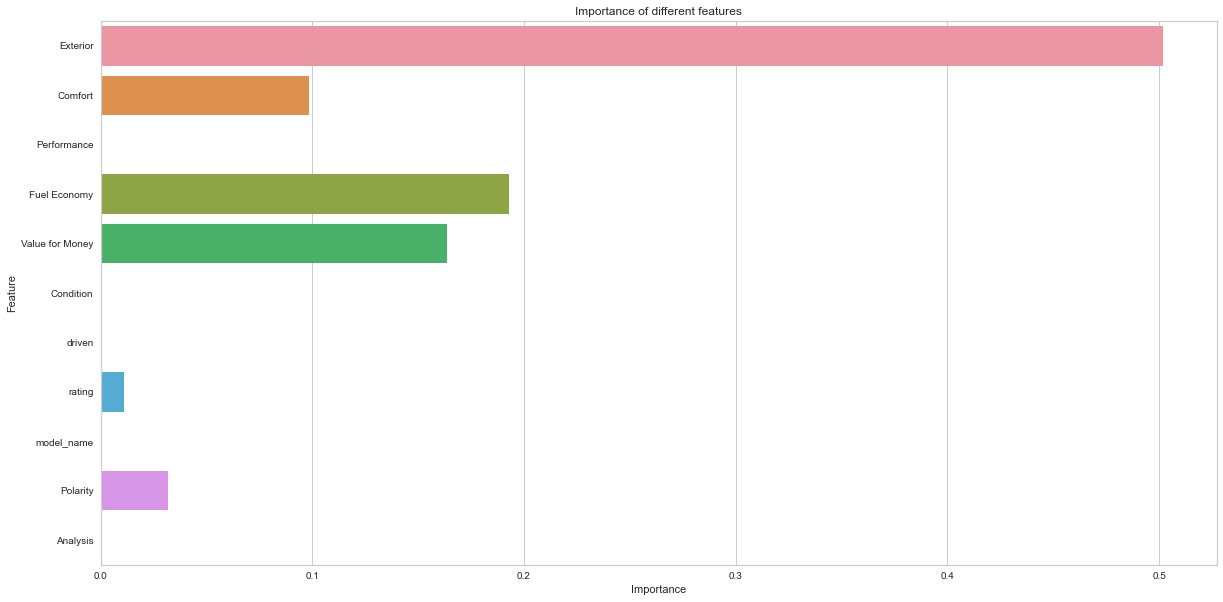

In [31]:
plt.figure(figsize=(20,10))
sns.barplot(y = X.columns, x = dtc.feature_importances_,orient='h')
plt.title("Importance of different features")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

cluster_num
0    4.260870
1    0.833333
2    4.923077
3    1.400000
4    2.529412
Name: Value for Money, dtype: float64


<AxesSubplot:xlabel='cluster_num'>

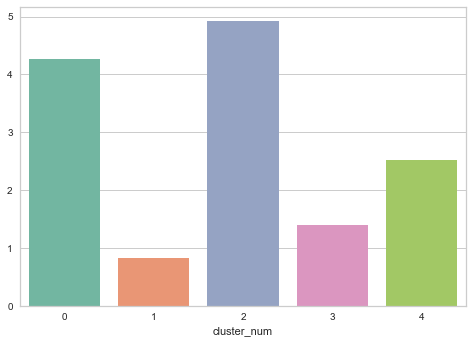

In [32]:
cluster_avg1 = four_wheel.groupby('cluster_num')['Value for Money'].mean()
print(cluster_avg1)
sns.barplot(x = cluster_avg1.index, y = cluster_avg1.values,palette='Set2')

cluster_num
0    4.260870
1    1.000000
2    4.923077
3    2.400000
4    4.117647
Name: Comfort, dtype: float64


Text(0.5, 1.0, 'Comfort vs Cluster')

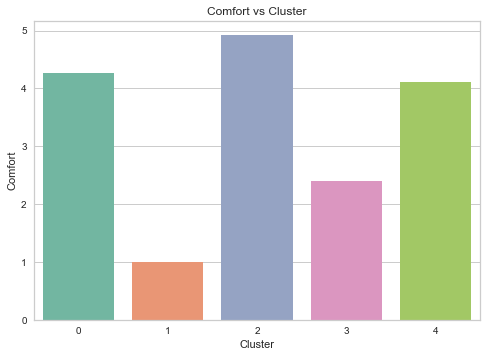

In [33]:
cluster_avg2 = four_wheel.groupby('cluster_num')['Comfort'].mean()
print(cluster_avg2)
sns.barplot(x = cluster_avg2.index, y = cluster_avg2.values,palette='Set2')
plt.xlabel('Cluster')
plt.ylabel('Comfort')
plt.title('Comfort vs Cluster')

cluster_num
0    3.913043
1    1.000000
2    5.000000
3    3.200000
4    4.411765
Name: Exterior, dtype: float64


<AxesSubplot:xlabel='cluster_num'>

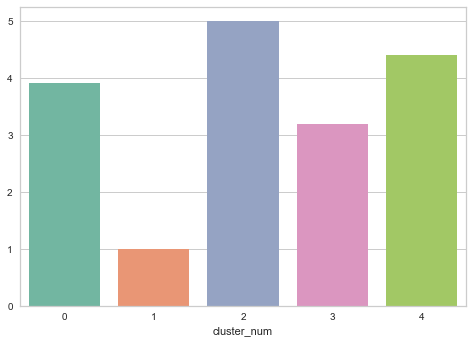

In [34]:
cluster_avg3 = four_wheel.groupby('cluster_num')['Exterior'].mean()
print(cluster_avg3)
sns.barplot(x = cluster_avg3.index, y = cluster_avg3.values,palette='Set2')